Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0927
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0078
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0055
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0052
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0049
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0046
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0043
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0038
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0032
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0032
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0025
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0030
Epoch 16/20
30/

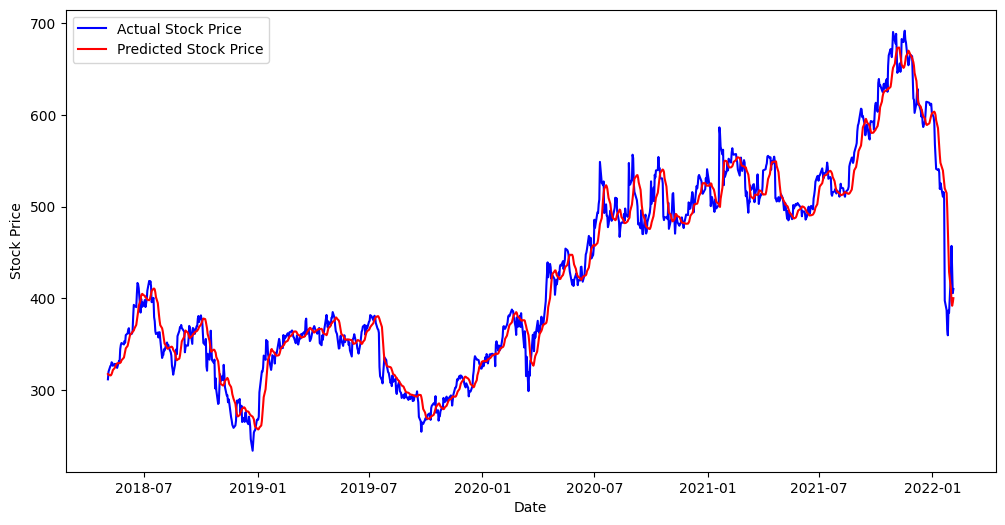

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (Replace 'your_file.csv' with your actual file path)
df = pd.read_csv('/content/NFLX.csv')

# ✅ Fixing Date Parsing Issues
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')  # Correct format
    df.set_index('Date', inplace=True)  # Set Date as index for visualization

# Select the column you want to predict (e.g., 'Close' price)
data = df[['Close']].values

# Normalize the data for better training
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Past 60 days data to predict the next day
X, Y = create_sequences(data_scaled, time_step)

# Reshape input to be 3D for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# ✅ Build the LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=20, batch_size=32)

# Predict future values
predicted_stock_price = model.predict(X)

# Convert back to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[time_step+1:], data[time_step+1:], label='Actual Stock Price', color='blue')
plt.plot(df.index[time_step+1:], predicted_stock_price, label='Predicted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
